In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import mdtraj as md
import numpy as np

In [2]:
crystal = md.load('1ubq.pdb')
Alphafold_result = md.load(r'rcsb_pdb_1UBQ/ranked_0.pdb')
Colabfold_result = md.load(r'ColabFold/1UBQ_result/1UBQ_7686d_unrelaxed_rank_1_model_4.pdb')

#### RMSD:backbone

In [3]:
crystal_backbone = crystal.top.select("backbone")
crystal_backbone 

array([  0,   1,   2,   3,   8,   9,  10,  11,  17,  18,  19,  20,  25,
        26,  27,  28,  36,  37,  38,  39,  43,  44,  45,  46,  52,  53,
        54,  55,  59,  60,  61,  62,  67,  68,  69,  70,  74,  75,  76,
        77,  78,  79,  80,  81,  87,  88,  89,  90,  94,  95,  96,  97,
       102, 103, 104, 105, 109, 110, 111, 112, 117, 118, 119, 120, 126,
       127, 128, 129, 133, 134, 135, 136, 142, 143, 144, 145, 149, 150,
       151, 152, 155, 156, 157, 158, 163, 164, 165, 166, 170, 171, 172,
       173, 178, 179, 180, 181, 187, 188, 189, 190, 195, 196, 197, 198,
       202, 203, 204, 205, 211, 212, 213, 214, 216, 217, 218, 219, 225,
       226, 227, 228, 233, 234, 235, 236, 242, 243, 244, 245, 250, 251,
       252, 253, 259, 260, 261, 262, 268, 269, 270, 271, 272, 273, 274,
       275, 280, 281, 282, 283, 287, 288, 289, 290, 294, 295, 296, 297,
       302, 303, 304, 305, 311, 312, 313, 314, 320, 321, 322, 323, 331,
       332, 333, 334, 339, 340, 341, 342, 347, 348, 349, 350, 35

In [4]:
Alpha_backbone = md.rmsd(Alphafold_result, crystal, 0, atom_indices=crystal_backbone)
Alpha_backbone = Alpha_backbone.tolist()
Alpha_backbone

[1.2952638864517212]

In [5]:
Colab_backbone = md.rmsd(Colabfold_result, crystal, 0, atom_indices=crystal_backbone)
Colab_backbone = Colab_backbone.tolist()
Colab_backbone

[0.16840089857578278]

#### RMSD:sidechain

In [6]:
crystal_sidechain = crystal.top.select("sidechain")
crystal_sidechain

array([  4,   5,   6,   7,  12,  13,  14,  15,  16,  21,  22,  23,  24,
        29,  30,  31,  32,  33,  34,  35,  40,  41,  42,  47,  48,  49,
        50,  51,  56,  57,  58,  63,  64,  65,  66,  71,  72,  73,  82,
        83,  84,  85,  86,  91,  92,  93,  98,  99, 100, 101, 106, 107,
       108, 113, 114, 115, 116, 121, 122, 123, 124, 125, 130, 131, 132,
       137, 138, 139, 140, 141, 146, 147, 148, 153, 154, 159, 160, 161,
       162, 167, 168, 169, 174, 175, 176, 177, 182, 183, 184, 185, 186,
       191, 192, 193, 194, 199, 200, 201, 206, 207, 208, 209, 210, 215,
       220, 221, 222, 223, 224, 229, 230, 231, 232, 237, 238, 239, 240,
       241, 246, 247, 248, 249, 254, 255, 256, 257, 258, 263, 264, 265,
       266, 267, 276, 277, 278, 279, 284, 285, 286, 291, 292, 293, 298,
       299, 300, 301, 306, 307, 308, 309, 310, 315, 316, 317, 318, 319,
       324, 325, 326, 327, 328, 329, 330, 335, 336, 337, 338, 343, 344,
       345, 346, 351, 352, 353, 354, 355, 356, 357, 362, 371, 37

In [7]:
Colab_sidechain_index = Colabfold_result.top.select("sidechain")
Colab_sidechain_index

array([  3,   5,   6,   7,  11,  13,  14,  15,  16,  20,  22,  23,  24,
        28,  30,  31,  32,  33,  34,  35,  39,  41,  42,  46,  48,  49,
        50,  51,  55,  57,  58,  62,  64,  65,  66,  70,  72,  73,  81,
        83,  84,  85,  86,  90,  92,  93,  97,  99, 100, 101, 105, 107,
       108, 112, 114, 115, 116, 120, 122, 123, 124, 125, 129, 131, 132,
       136, 138, 139, 140, 141, 145, 147, 148, 152, 154, 158, 160, 161,
       162, 166, 168, 169, 173, 175, 176, 177, 181, 183, 184, 185, 186,
       190, 192, 193, 194, 198, 200, 201, 205, 207, 208, 209, 210, 214,
       219, 221, 222, 223, 224, 228, 230, 231, 232, 236, 238, 239, 240,
       241, 245, 247, 248, 249, 253, 255, 256, 257, 258, 262, 264, 265,
       266, 267, 275, 277, 278, 279, 283, 285, 286, 290, 292, 293, 297,
       299, 300, 301, 305, 307, 308, 309, 310, 314, 316, 317, 318, 319,
       323, 325, 326, 327, 328, 329, 330, 334, 336, 337, 338, 342, 344,
       345, 346, 350, 352, 353, 354, 355, 356, 357, 361, 370, 37

In [8]:
Alpha_sidechain = md.rmsd(Alphafold_result, crystal, 0, atom_indices=crystal_sidechain)
Alpha_sidechain = Alpha_sidechain.tolist()
Alpha_sidechain

[1.2992324829101562]

In [9]:
Colab_sidechain = md.rmsd(Colabfold_result, crystal, 0, atom_indices=Colab_sidechain_index)
Colab_sidechain = Colab_sidechain.tolist()
Colab_sidechain

[0.24503248929977417]

#### RMSD:alpha-carbons

In [10]:
crystal_alphaC = crystal.top.select("name CA")
crystal_alphaC

array([  1,   9,  18,  26,  37,  44,  53,  60,  68,  75,  79,  88,  95,
       103, 110, 118, 127, 134, 143, 150, 156, 164, 171, 179, 188, 196,
       203, 212, 217, 226, 234, 243, 251, 260, 269, 273, 281, 288, 295,
       303, 312, 321, 332, 340, 348, 359, 364, 368, 377, 386, 394, 403,
       411, 415, 426, 433, 441, 447, 455, 467, 475, 483, 492, 501, 510,
       516, 523, 531, 541, 549, 556, 564, 575, 583, 594, 598])

In [11]:
Alpha_alphaC = md.rmsd(Alphafold_result, crystal, 0, atom_indices=crystal_alphaC)
Alpha_alphaC = Alpha_alphaC.tolist()
Alpha_alphaC

[1.3134127855300903]

In [12]:
Colab_alphaC = md.rmsd(Colabfold_result, crystal, 0, atom_indices=crystal_alphaC)
Colab_alphaC = Colab_alphaC.tolist()
Colab_alphaC

[0.08447302877902985]

#### Bar plot

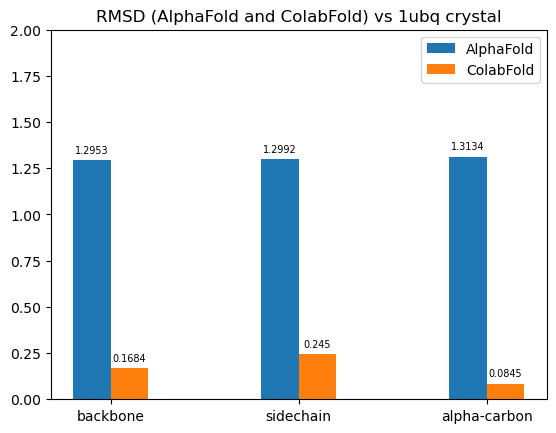

In [13]:
plt.figure()
x_axis_name = ['backbone', 'sidechain', 'alpha-carbon']
x_axis = np.arange(len(x_axis_name))
y_alpha = Alpha_backbone + Alpha_sidechain + Alpha_alphaC
y_alpha = list(np.around(np.array(y_alpha), 4))
plt.bar(x_axis - 0.1, y_alpha, width = 0.2, label = 'AlphaFold')

for x,y in zip(x_axis - 0.1, y_alpha):
    label = "{}".format(y)
    
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',
                 fontsize=7)

y_colab = Colab_backbone + Colab_sidechain + Colab_alphaC
y_colab = list(np.around(np.array(y_colab), 4))
plt.bar(x_axis + 0.1, y_colab, width = 0.2, label = 'ColabFold')

for x,y in zip(x_axis + 0.1, y_colab):
    label = "{}".format(y)
    
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',
                 fontsize=7)

plt.xticks(x_axis, x_axis_name)
plt.ylim(0, 2)
plt.legend()
plt.title('RMSD (AlphaFold and ColabFold) vs 1ubq crystal')
plt.savefig('RMSD.png')
plt.show()